In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url,names=['sepal width','sepal length','petal width','petal length','target'])

In [4]:
print(df.head())

   sepal width  sepal length  petal width  petal length       target
0          5.1           3.5          1.4           0.2  Iris-setosa
1          4.9           3.0          1.4           0.2  Iris-setosa
2          4.7           3.2          1.3           0.2  Iris-setosa
3          4.6           3.1          1.5           0.2  Iris-setosa
4          5.0           3.6          1.4           0.2  Iris-setosa


In [5]:
features = ['sepal width','sepal length','petal width','petal length']
x = df.loc[:,features].values
y = df.loc[:,['target']].values
x = StandardScaler().fit_transform(x)

In [6]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents,columns=['principal component 1','principal component 2'])
finalDf = pd.concat([principalDf,df[['target']]],axis=1)

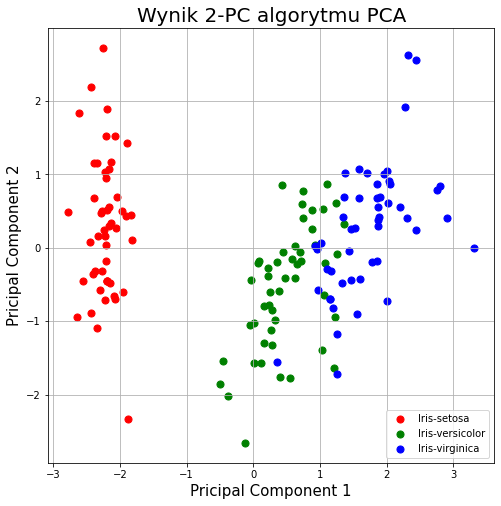

In [9]:
fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Pricipal Component 1',fontsize=15)
ax.set_ylabel('Pricipal Component 2',fontsize=15)
ax.set_title('Wynik 2-PC algorytmu PCA', fontsize = 20)
targets = ['Iris-setosa','Iris-versicolor','Iris-virginica']
colors=['r','g','b']
for target,color in zip(targets,colors):
    itk = finalDf['target'] == target
    ax.scatter(finalDf.loc[itk,'principal component 1'],
               finalDf.loc[itk,'principal component 2'],
               c=color,
               s=50)
ax.legend(targets)
ax.grid()

In [10]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])